# Introduction to SVM

In [1]:
#Used SVM to build and train a model using human cell records, and 
#classify cells to whether the samples are benign (mild state) or 
#malignant (evil state).SVM works by mapping data to a high-
#dimensional feature space so that data points can be categorized, 
#even when the data are not otherwise linearly separable (This gets 
#done by kernel function of SVM classifier). A separator between the 
#categories is found, then the data is transformed in such a way 
#that the separator could be drawn as a hyperplane.

# Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

# About the Cancer Data

In [3]:
#Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[https://www.youtube.com/redirect?v=7sz4WpkUIIs&redir_token=QUFFLUhqa0djZ215OS1RS3BvbmsybU5BNWVtMEdmdGJNd3xBQ3Jtc0tsSDhXV05LWWdGNHdXbmFCWlNCVE95aFZBTTVRbTd6X3dpRDJDT09Eck9hSWFZUllVMFZMVzJ2UFBHQWpYZGU2OEw2N2Y5Mm9kT1NVVGRNOVJYaWRmWDJuamdVbFJqNEFhcXUtQWpBOXJwa3d0MC0yMA%3D%3D&event=video_description&q=http%3A%2F%2Fmlearn.ics.uci.edu%2FMLRepository.html] 
#Public Source - https://www.youtube.com/redirect?v=7sz4WpkUIIs&redir_token=QUFFLUhqbDBfU3UwNEEySW5MNHAwWWQtajNGU3BhUEpsZ3xBQ3Jtc0ttRF9wY3UtMGtjZEY5VEs5TlRjR0lQUEVHVXl1SW4tQlFMOENMRjRxY1MtX2h5NUdkM21nUVI1RGFDSEVvSWF6elpiekFvRDNVMGRlZnZjbjdHN1FWbGN2dWtnN3V4Y0xzdjRqQ2xrS3E1Sjlta3Y0QQ%3D%3D&event=video_description&q=https%3A%2F%2Fs3-api.us-geo.objectstorage.softlayer.net%2Fcf-courses-data%2FCognitiveClass%2FML0101ENv3%2Flabs%2Fcell_samples.csv

# Load Data From CSV File 

In [4]:
#The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
#The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [5]:
cell_df = pd.read_csv(r"C:\Users\samer\Desktop\Machine Learning\Complementary Stuff\cell_samples.csv")

In [6]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [7]:
cell_df.shape

(699, 11)

In [8]:
cell_df.size

7689

In [9]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [10]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Distribution of the Classes

In [11]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

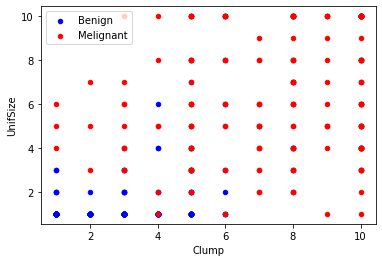

In [12]:
axes = benign_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'blue', label = 'Benign')
malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'red', label = 'Melignant', ax = axes)

# Identifying Unwanted Rows

# cell_df.dtypes

In [13]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [14]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Remove Unwanted Columns

In [15]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [16]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

y = np.asarray(cell_df['Class'])

In [17]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [18]:
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# Divide Data to Train and Test Datasets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Modelling (SVM with Sklearn)

In [20]:
# The SVM algorithm offers a choice of kernel functions for performing its
# processing. Basically, mapping the data into a higher dimensional space 
# called kernelling. The mathematical function used for the transformation
# is know as the kernel function, and can be of different types, such as:
# 1- Linear
# 2- Polynomial
# 3- Radial Basis Functions (RBF)
# 4- Sigmoid
# Check the SVM documentation to know more about the parameters of each

In [21]:
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)

In [22]:
classifier.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [23]:
y_predict = classifier.predict(X_test)

# Evaluation (Results)

In [24]:
report = classification_report(y_test, y_predict)

In [25]:
print(report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [26]:
# Precision = True Positive /  (True Positive + False Positive)

In [27]:
# Recall = True Positive / (True Positive + False Negative) 

In [28]:
# F1 = (2 * Precision * Recall) / (Precision + Recall)

In [29]:
# Support is the number of instance of class 2 and 4 (They total to 137 
#in this case)